### 📚 LeNet Model

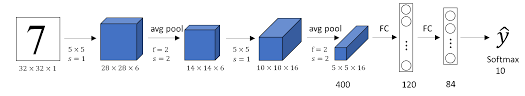

In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, AvgPool2D, Flatten, Dense, MaxPool2D, BatchNormalization, Concatenate, Dropout, GlobalAvgPool2D

In [2]:
LeNet_model = Sequential()
LeNet_model.add(Conv2D(6, kernel_size=5, activation='relu', input_shape=(28, 28,1), padding='same'))
LeNet_model.add(AvgPool2D((2, 2), strides=2))
LeNet_model.add(Conv2D(16, kernel_size=5, activation='relu'))
LeNet_model.add(AvgPool2D((2, 2), strides=2))
LeNet_model.add(Conv2D(120, kernel_size=5, activation='relu'))
LeNet_model.add(Flatten())
LeNet_model.add(Dense(84, activation='relu'))
LeNet_model.add(Dense(10, activation='softmax'))

In [3]:
LeNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

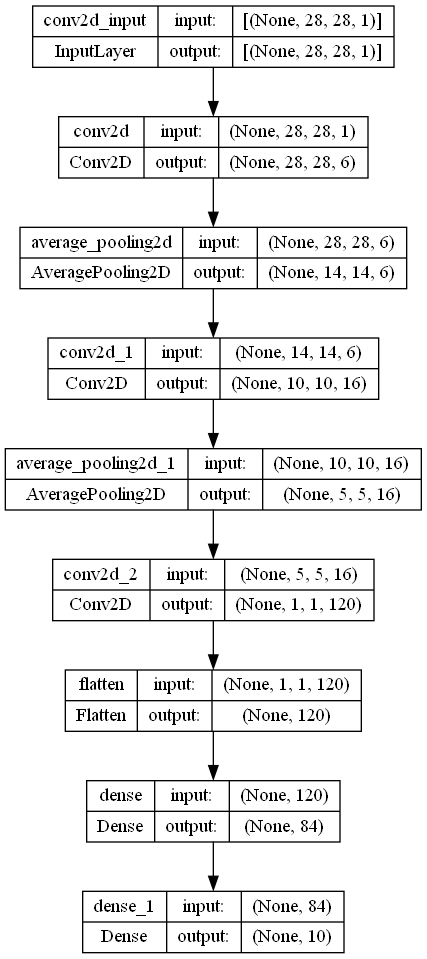

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(LeNet_model, show_shapes=True, show_layer_names=True)

### 📚 AlexNet Model

![AlexNet](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FJ29tU%2Fbtq8avdCrY7%2FaIWPxEtLDWMEZidf4Hr9O1%2Fimg.png)

In [9]:
inputs = Input(shape=(227, 227, 3))
c1 = Conv2D(96, kernel_size=11, strides=4, activation='relu')(inputs)
s2 = MaxPool2D((3, 3), strides=2)(c1)

c3 = Conv2D(256, kernel_size=5, padding='same', activation='relu')(s2)
s4 = MaxPool2D((3, 3), strides=2)(c3)

c5 = Conv2D(384, kernel_size=3, padding='same', activation='relu')(s4)
c6 = Conv2D(384, kernel_size=3, padding='same', activation='relu')(c5)
c7 = Conv2D(256, kernel_size=3, padding='same', activation='relu')(c6)
s8 = MaxPool2D((3, 3), strides=2)(c7)

f9 = Flatten()(s8)
d10 = Dense(4096, activation='relu')(f9)
d11 = Dense(4096, activation='relu')(d10)
outputs = Dense(1000, activation='softmax')(d11)

In [13]:
AlexNet = Model(inputs=inputs, outputs=outputs)

In [14]:
AlexNet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 384)       8851

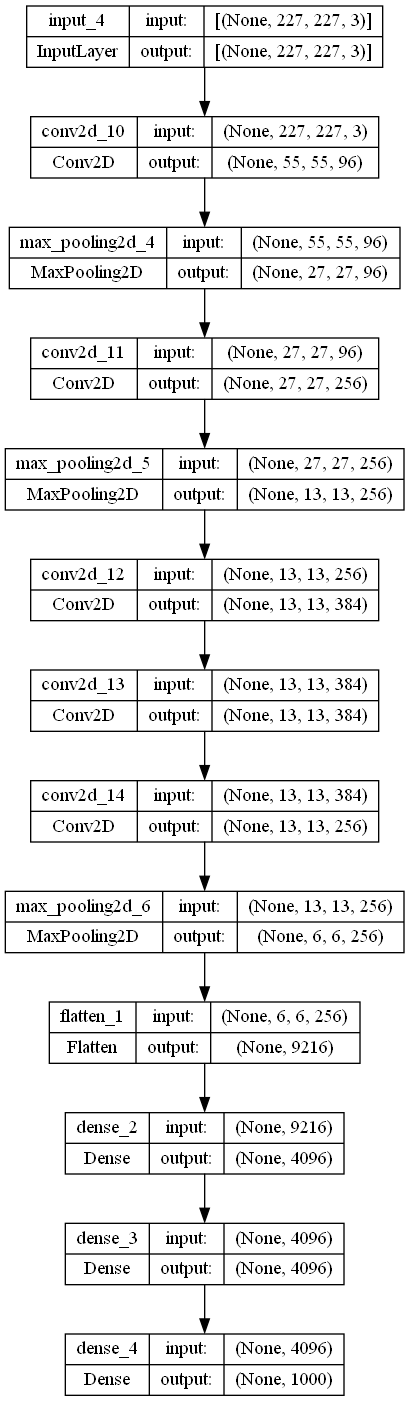

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(AlexNet, show_shapes=True, show_layer_names=True)

### 📚VGG16 Model

![VGG16](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FK990l%2FbtqwDJ7C54R%2F664Ksm6gyTGBR1wK3YPDFk%2Fimg.png)

In [20]:
class Vgg16(Sequential):
    def __init__(self, input_shape):
        super().__init__()
        self.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape)),
        self.add(Conv2D(64, (3, 3), activation='relu', padding='same')),
        self.add(MaxPool2D((2, 2), strides=2)),
                 
        self.add(Conv2D(128, (3, 3), activation='relu', padding='same')),
        self.add(Conv2D(128, (3, 3), activation='relu', padding='same')),
        self.add(MaxPool2D((2, 2), strides=2)),
        
        self.add(Conv2D(256, (3, 3), activation='relu', padding='same')),
        self.add(Conv2D(256, (3, 3), activation='relu', padding='same')),
        self.add(Conv2D(256, (3, 3), activation='relu', padding='same')),
        self.add(MaxPool2D((2, 2), strides=2)),
    
        self.add(Conv2D(512, (3, 3), activation='relu', padding='same')),
        self.add(Conv2D(512, (3, 3), activation='relu', padding='same')),
        self.add(Conv2D(512, (3, 3), activation='relu', padding='same')),
        self.add(MaxPool2D((2, 2), strides=2)),
        
        self.add(Flatten()),
        self.add(Dense(4096, activation='relu')),
        self.add(Dense(4096, activation='relu')),
        self.add(Dense(1000, activation='softmax')),
        self.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

In [21]:
vggmodel = Vgg16(input_shape=(224, 224, 3))

In [22]:
vggmodel.summary()

Model: "vgg16_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                       

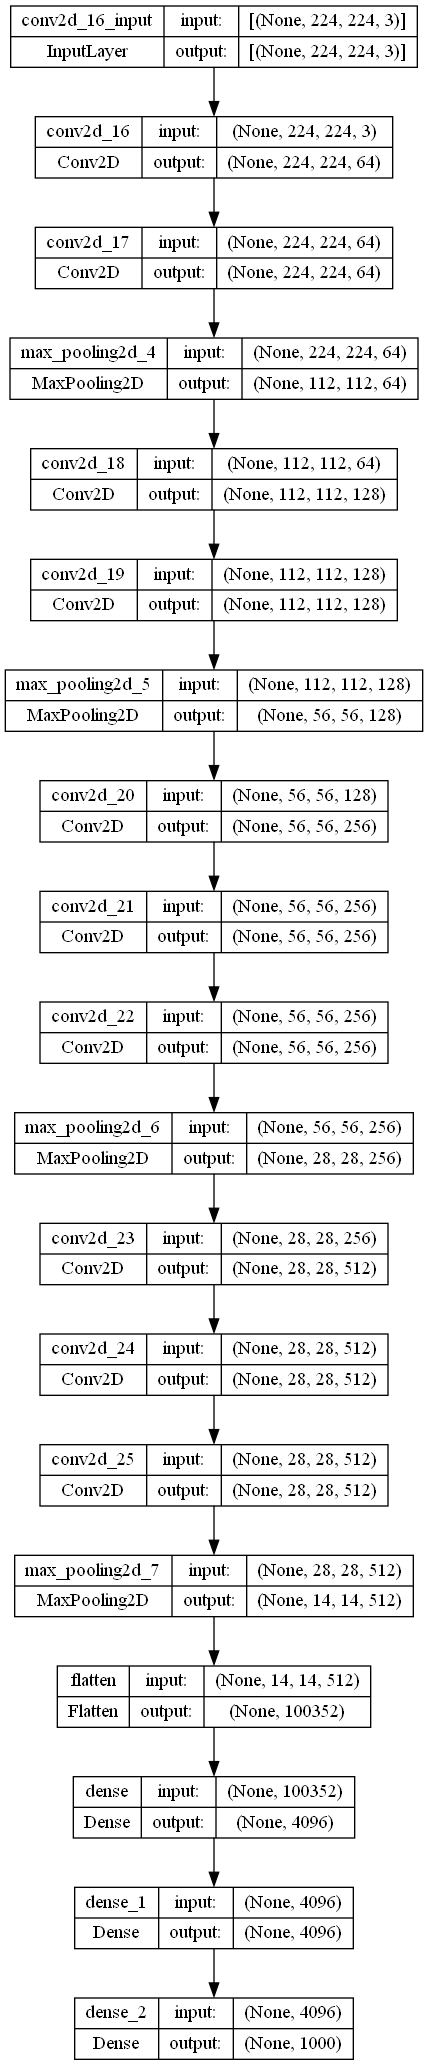

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(vggmodel, show_layer_names=True, show_shapes=True)

### 📚GoogleNet

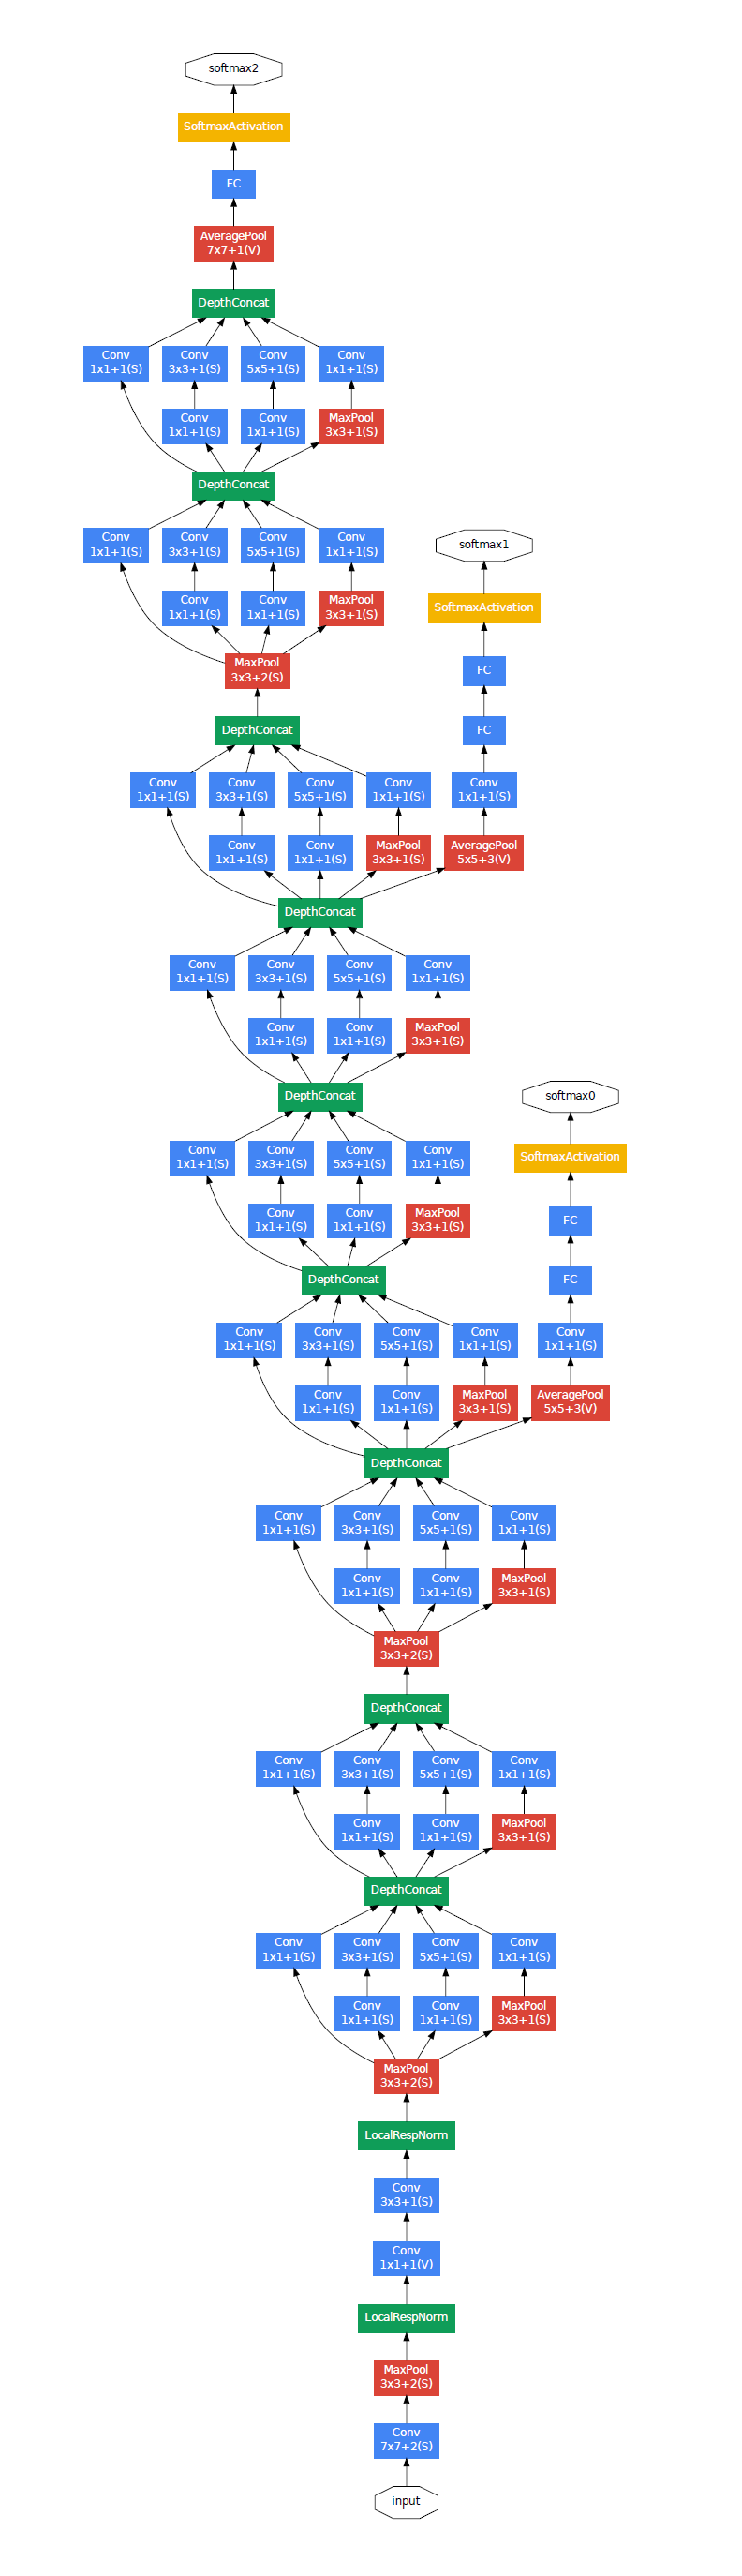

📌 22 layers <br>
📌 효과적인 "Inception" module <br>
📌 FC layer 없음

#### ✔️Inception Module

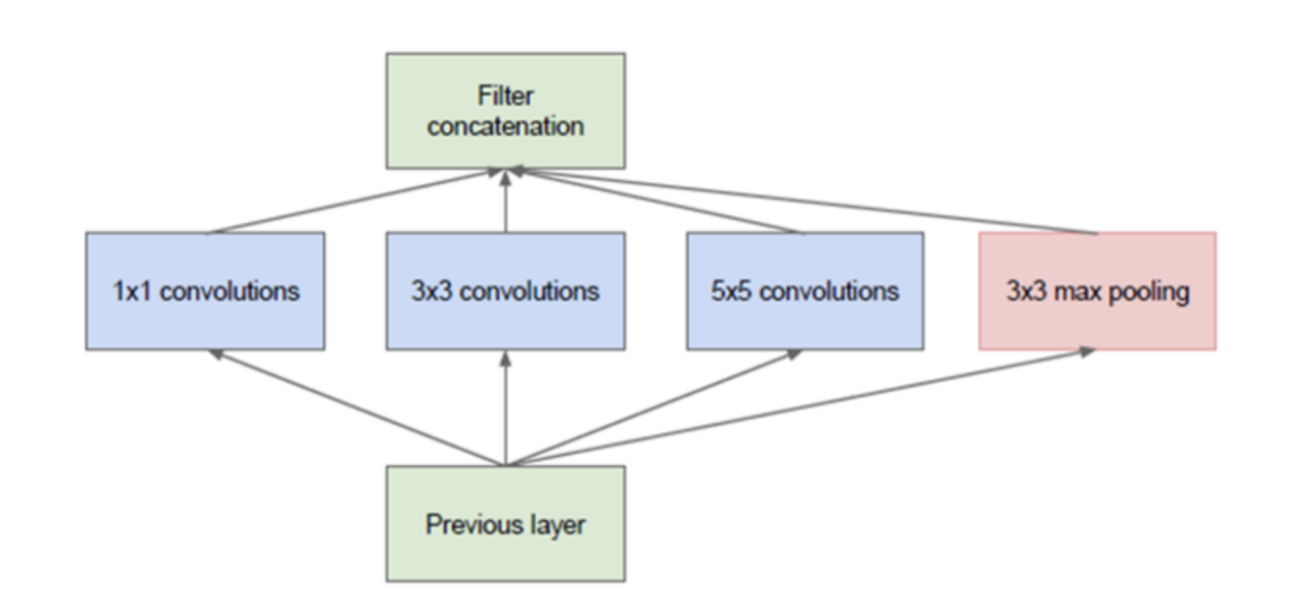

🔹이전 레이어의 출력에 다양한 필터 크기로 합성곱 연산을 한 것<br>
🔹input feature에서 의미있는 feature를 뽑아내기 위해서는 다양한 representation을 받아들일 수 있는 필터들이 필요

In [4]:
def inception(input_tensor, filter_channels):
    filter_1x1, filter_3x3_R, filter_3x3, filter_5x5_R, filter_5x5, pool_proj = filter_channels
                                                                                        # 가중치 초기화 -> He 정규분포
    branch_1 = Conv2D(filter_1x1, (1, 1), strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
    
    branch_2 = Conv2D(filter_3x3_R, (1, 1), strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
    branch_2 = Conv2D(filter_3x3, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(branch_2)
    
    branch_3 = Conv2D(filter_5x5_R, (1, 1), strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
    branch_3 = Conv2D(filter_5x5, (5, 5), strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(branch_3)
    
    branch_4 = MaxPool2D((3, 3), strides=1, padding='same')(input_tensor)
    branch_4 = Conv2D(pool_proj, (1, 1), strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(branch_4)
    
    DepthConcat = Concatenate()([branch_1, branch_2, branch_3, branch_4])
    
    return DepthConcat

In [7]:
def GoogleNet(model_input, classes=10):
    conv1 = Conv2D(64, kernel_size=7, strides=2, padding='same', activation='relu')(model_input)
    pool1 = MaxPool2D((3, 3), strides=2, padding='same')(conv1)

    conv2 = Conv2D(192, kernel_size=3, padding='same', activation='relu')(pool1)
    pool2 = MaxPool2D((3, 3), strides=2, padding='same')(conv2)
    
    inception_3a = inception(pool2, [64, 96, 128, 16, 32, 32])
    inception_3b = inception(inception_3a, [128, 128, 192, 32, 96, 64])
    
    pool3 = MaxPool2D((3, 3), strides=2, padding='same')(inception_3b)
    
    inception_4a = inception(pool3, [192, 96, 208, 16, 48, 64])
    inception_4b = inception(inception_4a, [160, 112, 224, 24, 64, 64])
    inception_4c = inception(inception_4b, [128, 128, 256, 24, 64, 64])
    inception_4d = inception(inception_4c, [112, 144, 288, 32, 64, 64])
    inception_4e = inception(inception_4d, [256, 160, 320, 32, 128, 128])
    
    pool4 = MaxPool2D((3, 3), strides=2, padding='same')(inception_4e)
    
    inception_5a = inception(pool4, [256, 160, 320, 32, 128, 128])
    inception_5b = inception(inception_5a, [384, 192, 384, 48, 128, 128])
    
    # 전체 영역에 대한 Pooling, Output은 feature의 갯수
    pool5 = GlobalAvgPool2D()(inception_5b)
    drop1 = Dropout(0.4)(pool5)
    
    linear = Dense(1000, activation='relu')(drop1)
    
    model_output = Dense(classes, activation='softmax')(linear)
    
    # Auxiliary Classifier (보조 학습)
    auxiliary_4a = AvgPool2D((5, 5), strides=3, padding='valid')(inception_4a)
    auxiliary_4a = Conv2D(128, kernel_size=1, strides=1, padding='same', activation='relu')(auxiliary_4a)
    auxiliary_4a = Flatten()(auxiliary_4a)
    auxiliary_4a = Dense(1024, activation='relu')(auxiliary_4a)
    auxiliary_4a = Dropout(0.7)(auxiliary_4a)
    auxiliary_4a = Dense(classes, activation='softmax')(auxiliary_4a)
    
    auxiliary_4d = AvgPool2D((5, 5), strides=3, padding='valid')(inception_4d)
    auxiliary_4d = Conv2D(128, kernel_size=1, strides=1, padding='same', activation='relu')(auxiliary_4d)
    auxiliary_4d = Flatten()(auxiliary_4d)
    auxiliary_4d = Dense(1024, activation='relu')(auxiliary_4d)
    auxiliary_4d = Dropout(0.7)(auxiliary_4d)
    auxiliary_4d = Dense(classes, activation='softmax')(auxiliary_4d)
    
    model = Model(model_input, [model_output, auxiliary_4a, auxiliary_4d])
    
    return model

In [8]:
input_shape = (224, 224, 3)
model_input = Input(shape=input_shape)

In [9]:
model = GoogleNet(model_input, 10)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

                                                                                                  
 conv2d_24 (Conv2D)             (None, 14, 14, 64)   38464       ['conv2d_23[0][0]']              
                                                                                                  
 conv2d_25 (Conv2D)             (None, 14, 14, 64)   32832       ['max_pooling2d_6[0][0]']        
                                                                                                  
 concatenate_3 (Concatenate)    (None, 14, 14, 512)  0           ['conv2d_20[0][0]',              
                                                                  'conv2d_22[0][0]',              
                                                                  'conv2d_24[0][0]',              
                                                                  'conv2d_25[0][0]']              
                                                                                                  
 conv2d_27

 conv2d_49 (Conv2D)             (None, 7, 7, 128)    106624      ['max_pooling2d_11[0][0]']       
                                                                                                  
 concatenate_7 (Concatenate)    (None, 7, 7, 832)    0           ['conv2d_44[0][0]',              
                                                                  'conv2d_46[0][0]',              
                                                                  'conv2d_48[0][0]',              
                                                                  'conv2d_49[0][0]']              
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 192)    159936      ['concatenate_7[0][0]']          
                                                                                                  
 conv2d_53 (Conv2D)             (None, 7, 7, 48)     39984       ['concatenate_7[0][0]']          
          

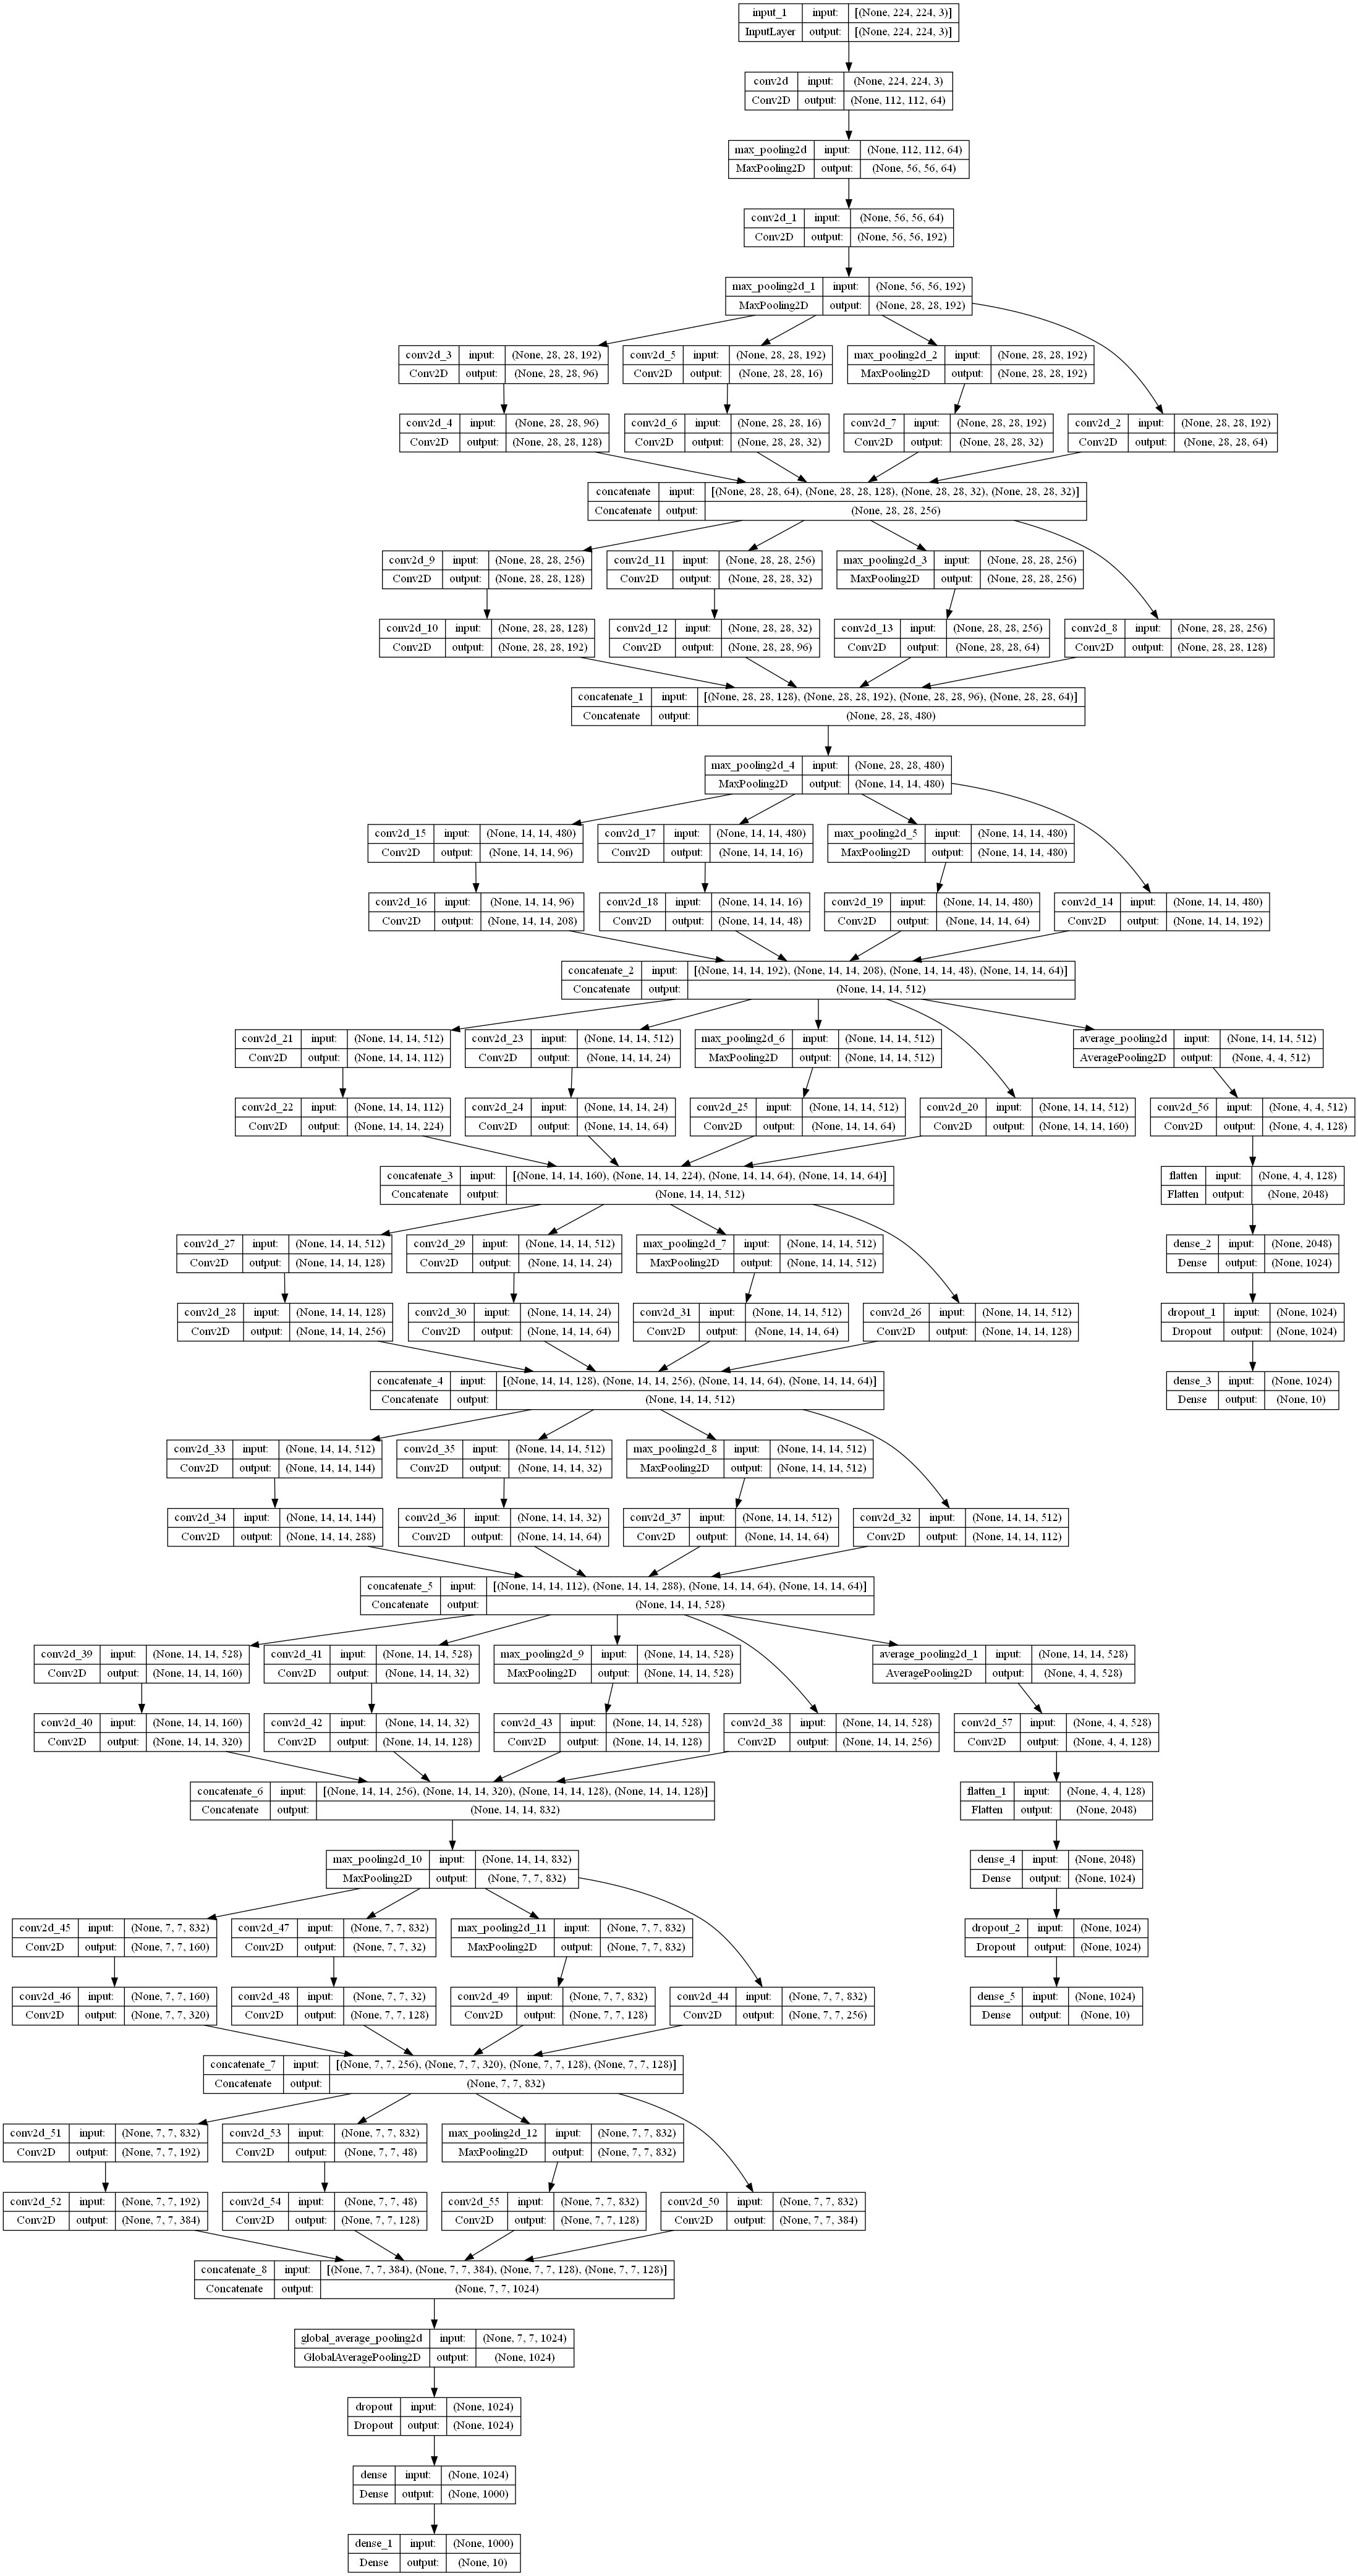

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)